# Project Report on Fuel Efficiency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('P01.csv')
df=df.iloc[:,1:]

In [3]:
df.head(5)

,Cylinders,Weight\n(tons),Drive Ratio,Horse-\npower,Displacement,Country\nMfg.,Fuel Efficiency\n(Miles-Per-Gallon)
0,8,4.360,2.73,155,350,US,16.9
1,8,4.054,2.26,142,351,US,15.5
2,8,3.605,2.56,125,267,US,18.5
3,8,3.940,2.45,150,360,US,30.0
4,4,2.155,3.70,68,98,US,27.5


Before we proceed with doing any ML and DL stuff lets first try to understand the data, look into each variable(Exploratory) and try to know what it means to the response variable.

Our basic understanding about cars and its fuel efficiency says us:

1. increase in nos of cylinders decreases the fuel efficiency.
2. increase in car weight decreases the fuel efficiency.
3. increase in horsepower dcreases the fuel efficiency
4. increase in displacement decrease the fuel efficiency.

We also know some information about how some of these exploratory variables has association between others.

- higher the cylinder, higher is the horsepower, higher is the displacement

Now that we gathered some information lets perform some data analysis and data visualizations to know our finding and deepen our 
initial observations.

In [4]:
df.describe()

,Cylinders,Weight\n(tons),Drive Ratio,Horse-\npower,Displacement,Fuel Efficiency\n(Miles-Per-Gallon)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,5.394737,2.862895,3.093421,101.736842,177.289474,24.789474
std,1.603029,0.706870,0.517657,26.444929,88.876747,6.524457
min,4.000000,1.915000,2.260000,65.000000,85.000000,15.500000
25%,4.000000,2.207500,2.695000,78.500000,105.000000,18.525000
50%,4.500000,2.685000,3.080000,100.000000,148.500000,24.250000
75%,6.000000,3.410000,3.625000,123.750000,229.500000,30.375000
max,8.000000,4.360000,3.900000,155.000000,360.000000,37.300000


Lets first go deep into the response variable and see how its distribution, its shape and how the distributions changes based on the different countries.

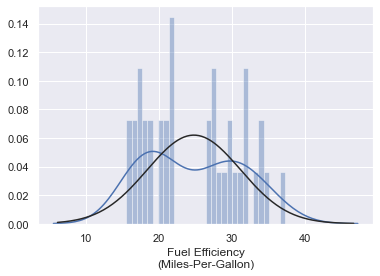

In [5]:
sns.distplot(df['Fuel Efficiency\n(Miles-Per-Gallon)'],bins=30,kde=True,fit=st.norm)

((array([-2.0952281 , -1.70760235, -1.47638338, -1.30476803, -1.16479324,
         -1.04454449, -0.93776655, -0.84073708, -0.75104414, -0.66702379,
         -0.58747045, -0.51147479, -0.43832668, -0.36745409, -0.29838258,
         -0.23070752, -0.16407401, -0.09816191, -0.03267398,  0.03267398,
          0.09816191,  0.16407401,  0.23070752,  0.29838258,  0.36745409,
          0.43832668,  0.51147479,  0.58747045,  0.66702379,  0.75104414,
          0.84073708,  0.93776655,  1.04454449,  1.16479324,  1.30476803,
          1.47638338,  1.70760235,  2.0952281 ]),
  array([15.5, 16.2, 16.5, 16.9, 17. , 17. , 17.6, 18.1, 18.2, 18.5, 18.6,
         20.3, 20.3, 20.6, 20.8, 21.5, 21.6, 21.9, 22. , 26.5, 26.8, 27.2,
         27.4, 27.5, 28.4, 28.8, 29.5, 30. , 30.5, 30.9, 31.5, 31.8, 31.9,
         33.5, 34.1, 34.2, 35.1, 37.3])),
 (6.524510243574121, 24.78947368421053, 0.9682838226474078))

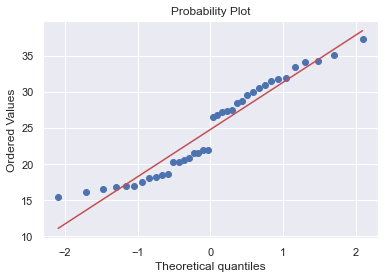

In [6]:
st.probplot(df['Fuel Efficiency\n(Miles-Per-Gallon)'],plot=plt)

We can clearly see that response variable is not normally distributed and we will try address this issue atter and see if apply transformation helps to be normal distribution.

In [7]:
df.groupby('Country\nMfg.')['Fuel Efficiency\n(Miles-Per-Gallon)'].agg('mean')

Country\nMfg.
Europe    25.311111
Japan     30.085714
US        22.890909
Name: Fuel Efficiency\n(Miles-Per-Gallon), dtype: float64

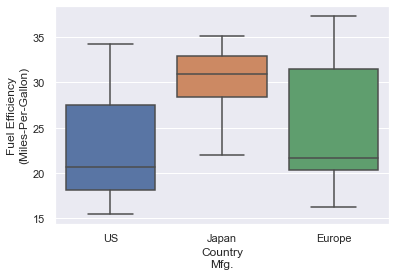

In [8]:
sns.boxplot(x=df['Country\nMfg.'],y=df['Fuel Efficiency\n(Miles-Per-Gallon)'])

We can see that on an average (median) the US , europe have similar fuel efficiency whereas the for japan its much higher. 

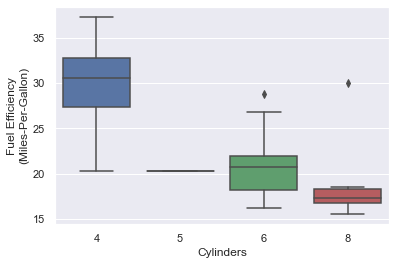

In [9]:
sns.boxplot(x=df['Cylinders'],y=df['Fuel Efficiency\n(Miles-Per-Gallon)'])

We see some intresting things..!!!! potential outliers at cylinder 6 , 8. we can have to possibility
1. its trying to say us some intresting behaviour
2. it does not have any usefulness to our model and can be deleted.

We also see that as we are increasing the nos of cylinders, there is decrease in the fuel efficiency.

Now that we understand the response variable lets start the bivariate analysis.

In [10]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head()

,Cylinders,Weight\n(tons),Drive Ratio,Horse-\npower,Displacement,Fuel Efficiency\n(Miles-Per-Gallon)
0,8,4.360,2.73,155,350,16.9
1,8,4.054,2.26,142,351,15.5
2,8,3.605,2.56,125,267,18.5
3,8,3.940,2.45,150,360,30.0
4,4,2.155,3.70,68,98,27.5


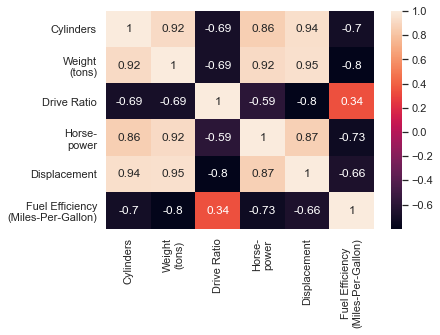

In [11]:
sns.heatmap(df_num.corr(),annot=True)

Here we find some intresting correlations are we have expected.

- Cylinders, Weights, Horse power and Displacement are highly correlated to each other( strong postive association).
- Weight and horse power shows high coorelation(strong negative association) to response variable(fuel efficiency) when compared to others.

We cannot just conclude by the correlation value as visualize might give us different picture. We can conclude to associations by seeing the scatter plots between each other.

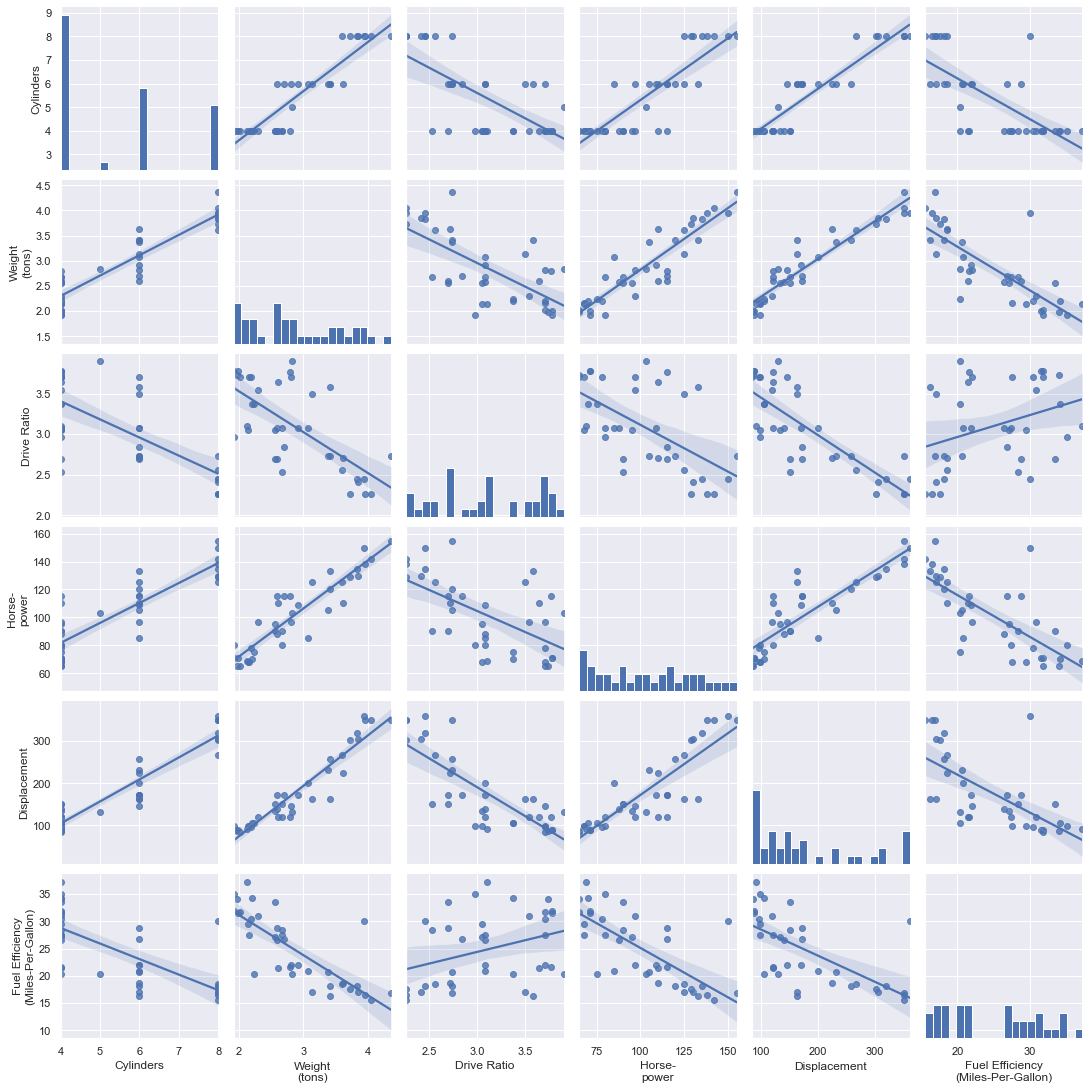

In [12]:
sns.pairplot(df_num,kind='reg',diag_kind='hist',diag_kws={'bins':20})

As we saw from the correlation heatmap we get strong evidance from scatter plots about linear association

- On carefull observation we can see 2 common outliers which has some unusual behaviour from general data. those indexes are {3,7} in our data set.
- There is a strong -ve correlation btw fuel efficiency and other variables except with the drive ratio which is almost randomly scattered which also provides evidance to our initial observations.
- We can clearly see 3 groups in cylinder variables from histogram


#### Since cylinders, weights, horsepower, displacement are highly correlated and using any one of among could possible explanation(HOPEFULLY!!) for fuel efficiency so ,lets take weight among them as it has high correlation with the fuel efficiency.


In [13]:
df['Cylinders'].value_counts()

4    19
6    10
8     8
5     1
Name: Cylinders, dtype: int64

* Here the frequency of the cylinders shows us some important information ie.. the data is not balanced. we can do over sampling in order to make the dataset balanced but we will leave it as imbalanced. If the dataset is balanced then our model would able to learn well.

#### NOTE: being data unbalanced it might be possible that on random splitting of dataset cylinder with 5 feature might go to test set and hence our model does not learn about it well and would get prediction with large error thereby increasing the RMS error.

Now that we know which variables are useful and outliers are detected ,we are done with feature selection using EDA 

#### we know from the boxplots above there are potentially 2 outliers at cylinder 6,8 .From these 8 lies far away from the general data and not representing the data so we will delete that row. Since we see at cylinder 6 even though outlier but closer to general data so we try to keep that and see how its effecting the model and perform action based on that. 

## NOTE:- since we have few sample data we cannot expect the data to be nearly normal. If we have enough sample data(size) then sample error would be less and therefore data would be nearly normal distribution

### Lets now perform some statistics in order to know which of them are statistically significent.

In [15]:
#readind the data from .csv file
dt=pd.read_csv('P01.csv')
dt=dt.loc[:,'Cylinders':]

#removing the outlier from the data 
dt=dt.drop(index=[3,7],axis=0)

#having only features without any multicollinearity
X=dt[['Weight\n(tons)','Drive Ratio','Country\nMfg.']]
y=dt.iloc[:,-1]

#preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct_x=ColumnTransformer([('encode',OneHotEncoder(),[2])],remainder='passthrough')
X=np.array(ct_x.fit_transform(X),dtype=np.float64)
X=X[:,1:]


#automatic checking of p-values using backward elimation to find statically significent features
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j]== maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x

import statsmodels.api as sm
X_temp=np.concatenate((np.ones((y.size,1)),X),axis=1)
SL = 0.05

X_opt = X_temp[:, [0,1,2,3,4]]
X_Modeled = backwardElimination(X_opt, SL)

                                    OLS Regression Results                                    
Dep. Variable:     Fuel Efficiency
(Miles-Per-Gallon)   R-squared:                       0.890
Model:                                            OLS   Adj. R-squared:                  0.883
Method:                                 Least Squares   F-statistic:                     132.9
Date:                                Tue, 31 Mar 2020   Prob (F-statistic):           1.62e-16
Time:                                        01:48:23   Log-Likelihood:                -78.883
No. Observations:                                  36   AIC:                             163.8
Df Residuals:                                      33   BIC:                             168.5
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          t      P

## WOW!!!!! 

####  We see that performing a through EDA and Statatical methods we where able to get a better model with Adjusted R-squared 0.88. This is definitely a good model. 

#### This model consists of {bias ,Weight, Driver ratio} features for predicting the fuel efficiency.  


In [16]:
X=X_Modeled[:,1:]

#splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

#performing the multi linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#performance evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
accuracies = cross_val_score(estimator =reg, X = X_train, y = y_train, cv = 10)
print("Mean squared error of training set: %.2f " % np.sqrt(mean_squared_error(y_train,reg.predict(X_train))))
print("Mean squared error of test set: %.2f " % np.sqrt(mean_squared_error(y_test, y_pred)))

Mean squared error of training set: 2.22 
Mean squared error of test set: 1.97 


We see that linear regression model works perfect with RSME of training and Test set with not much difference.

##### when i excuted for mulitiple times i see that whenever the index=0 in our dataset is present in test set there is a significent increase RSME of test set. This could be because weight of that row is way far from the normal data.

##### NOTE: i tried removing the index=0 and run the model and i see that it works perfect with Adjusted R^2 to be 0.92. and both the RSME are not that difference. It also generalizes the data very well